In [174]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [175]:
start_date = datetime(2022, 5, 8)
end_date = datetime(2023, 4, 8)
tickers = ['AAPL', 'TSLA']

df = yf.download(tickers, start=start_date, end=end_date, progress=False)
df.head()

Adj Close                   Close                    High  \
                  AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2022-05-09  150.754944  262.369995  152.059998  262.369995  155.830002   
2022-05-10  153.183914  266.679993  154.509995  266.679993  156.740005   
2022-05-11  145.242661  244.666672  146.500000  244.666672  155.449997   
2022-05-12  141.336487  242.666672  142.559998  242.666672  146.199997   
2022-05-13  145.847443  256.529999  147.110001  256.529999  148.100006   

                               Low                    Open              \
                  TSLA        AAPL        TSLA        AAPL        TSLA   
Date                                                                     
2022-05-09  281.876678  151.490005  260.383331  154.929993  278.816681   
2022-05-10  275.119995  152.929993  258.083344  155.520004  273.103333   
2022-05-11  269.923340  145.809998  242.399994  153.500000  265.000000   
2022-05-12  253.220001  138.800003  226.666672  142.770004  233.666672   
2022-05-13  262.450012  143.110001  250.523331  144.589996  257.826660   

               Volume             
                 AAPL       TSLA  
Date                              
2022-05-09  131577900   90810300  
2022-05-10  115366700   84401700  
2022-05-11  142689800   97224600  
2022-05-12  182602000  140313000  
2022-05-13  113990900   92150700

In [176]:
df.tail()

Adj Close                   Close                    High  \
                  AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2023-03-31  164.233765  207.460007  164.899994  207.460007  165.000000   
2023-04-03  165.498657  194.770004  166.169998  194.770004  166.289993   
2023-04-04  164.960846  192.580002  165.630005  192.580002  166.839996   
2023-04-05  163.098389  185.520004  163.759995  185.520004  165.050003   
2023-04-06  163.994766  185.059998  164.660004  185.059998  164.960007   

                               Low                    Open              \
                  TSLA        AAPL        TSLA        AAPL        TSLA   
Date                                                                     
2023-03-31  207.789993  161.910004  197.199997  162.440002  197.529999   
2023-04-03  202.690002  164.220001  192.199997  164.270004  199.910004   
2023-04-04  198.740005  165.110001  190.320007  166.600006  197.320007   
2023-04-05  190.679993  161.800003  183.759995  164.740005  190.520004   
2023-04-06  186.389999  162.000000  179.740005  162.429993  183.080002   

              Volume             
                AAPL       TSLA  
Date                             
2023-03-31  68749800  170222100  
2023-04-03  56976200  169545900  
2023-04-04  46278300  126463800  
2023-04-05  51511700  133882500  
2023-04-06  45390100  123857900

In [177]:
df = df.drop(['Adj Close'], axis = 1)
df.head()

Close                    High                     Low  \
                  AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2022-05-09  152.059998  262.369995  155.830002  281.876678  151.490005   
2022-05-10  154.509995  266.679993  156.740005  275.119995  152.929993   
2022-05-11  146.500000  244.666672  155.449997  269.923340  145.809998   
2022-05-12  142.559998  242.666672  146.199997  253.220001  138.800003   
2022-05-13  147.110001  256.529999  148.100006  262.450012  143.110001   

                              Open                 Volume             
                  TSLA        AAPL        TSLA       AAPL       TSLA  
Date                                                                  
2022-05-09  260.383331  154.929993  278.816681  131577900   90810300  
2022-05-10  258.083344  155.520004  273.103333  115366700   84401700  
2022-05-11  242.399994  153.500000  265.000000  142689800   97224600  
2022-05-12  226.666672  142.770004  233.666672  182602000  140313000  
2022-05-13  250.523331  144.589996  257.826660  113990900   92150700

In [178]:
df.reset_index(inplace=True)
df.drop(columns=['Date'])

C:\Users\rishm\AppData\Local\Temp\ipykernel_26856\1355882422.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(columns=['Date'])


Close                    High                     Low              \
           AAPL        TSLA        AAPL        TSLA        AAPL        TSLA   
0    152.059998  262.369995  155.830002  281.876678  151.490005  260.383331   
1    154.509995  266.679993  156.740005  275.119995  152.929993  258.083344   
2    146.500000  244.666672  155.449997  269.923340  145.809998  242.399994   
3    142.559998  242.666672  146.199997  253.220001  138.800003  226.666672   
4    147.110001  256.529999  148.100006  262.450012  143.110001  250.523331   
..          ...         ...         ...         ...         ...         ...   
225  164.899994  207.460007  165.000000  207.789993  161.910004  197.199997   
226  166.169998  194.770004  166.289993  202.690002  164.220001  192.199997   
227  165.630005  192.580002  166.839996  198.740005  165.110001  190.320007   
228  163.759995  185.520004  165.050003  190.679993  161.800003  183.759995   
229  164.660004  185.059998  164.960007  186.389999  162.000000  179.740005   

           Open                 Volume             
           AAPL        TSLA       AAPL       TSLA  
0    154.929993  278.816681  131577900   90810300  
1    155.520004  273.103333  115366700   84401700  
2    153.500000  265.000000  142689800   97224600  
3    142.770004  233.666672  182602000  140313000  
4    144.589996  257.826660  113990900   92150700  
..          ...         ...        ...        ...  
225  162.440002  197.529999   68749800  170222100  
226  164.270004  199.910004   56976200  169545900  
227  166.600006  197.320007   46278300  126463800  
228  164.740005  190.520004   51511700  133882500  
229  162.429993  183.080002   45390100  123857900  

[230 rows x 10 columns]

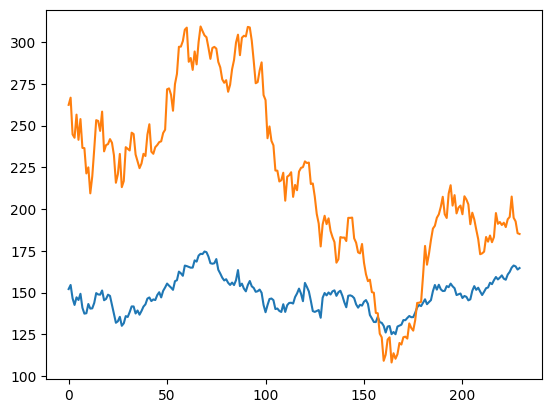

In [179]:
plt.plot(df.Close)

In [180]:
df

Date       Close                    High                     Low  \
                      AAPL        TSLA        AAPL        TSLA        AAPL   
0   2022-05-09  152.059998  262.369995  155.830002  281.876678  151.490005   
1   2022-05-10  154.509995  266.679993  156.740005  275.119995  152.929993   
2   2022-05-11  146.500000  244.666672  155.449997  269.923340  145.809998   
3   2022-05-12  142.559998  242.666672  146.199997  253.220001  138.800003   
4   2022-05-13  147.110001  256.529999  148.100006  262.450012  143.110001   
..         ...         ...         ...         ...         ...         ...   
225 2023-03-31  164.899994  207.460007  165.000000  207.789993  161.910004   
226 2023-04-03  166.169998  194.770004  166.289993  202.690002  164.220001   
227 2023-04-04  165.630005  192.580002  166.839996  198.740005  165.110001   
228 2023-04-05  163.759995  185.520004  165.050003  190.679993  161.800003   
229 2023-04-06  164.660004  185.059998  164.960007  186.389999  162.000000   

                       Open                 Volume             
           TSLA        AAPL        TSLA       AAPL       TSLA  
0    260.383331  154.929993  278.816681  131577900   90810300  
1    258.083344  155.520004  273.103333  115366700   84401700  
2    242.399994  153.500000  265.000000  142689800   97224600  
3    226.666672  142.770004  233.666672  182602000  140313000  
4    250.523331  144.589996  257.826660  113990900   92150700  
..          ...         ...         ...        ...        ...  
225  197.199997  162.440002  197.529999   68749800  170222100  
226  192.199997  164.270004  199.910004   56976200  169545900  
227  190.320007  166.600006  197.320007   46278300  126463800  
228  183.759995  164.740005  190.520004   51511700  133882500  
229  179.740005  162.429993  183.080002   45390100  123857900  

[230 rows x 11 columns]

In [181]:
ma100 = df.Close.rolling(100).mean()
ma100

,AAPL,TSLA
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
225,145.333499,171.7865
226,145.605999,171.7634
227,145.867299,171.7762
228,146.156199,171.8555


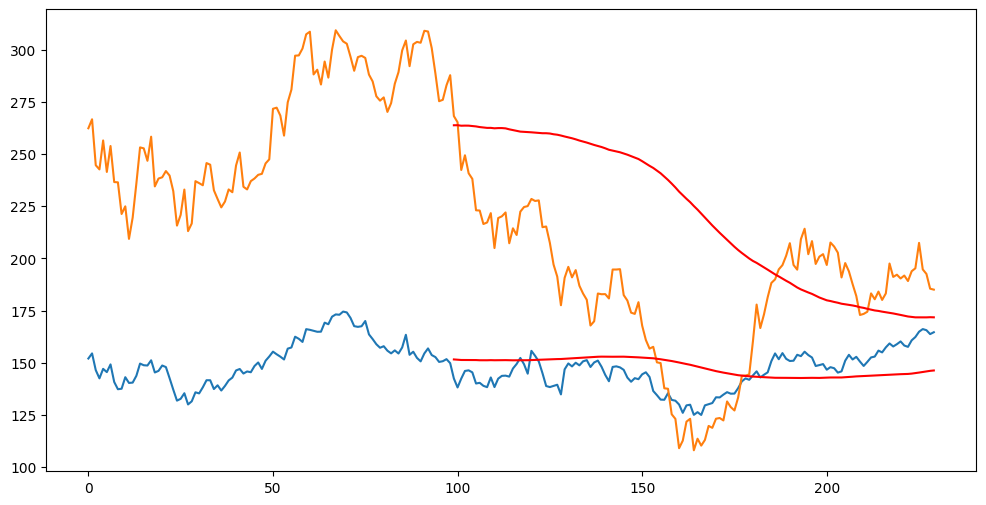

In [182]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [183]:
ma200 = df.Close.rolling(200).mean()
ma200

,AAPL,TSLA
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
225,148.498249,215.824434
226,148.651950,215.633284
227,148.829800,215.530684
228,148.990800,215.374484


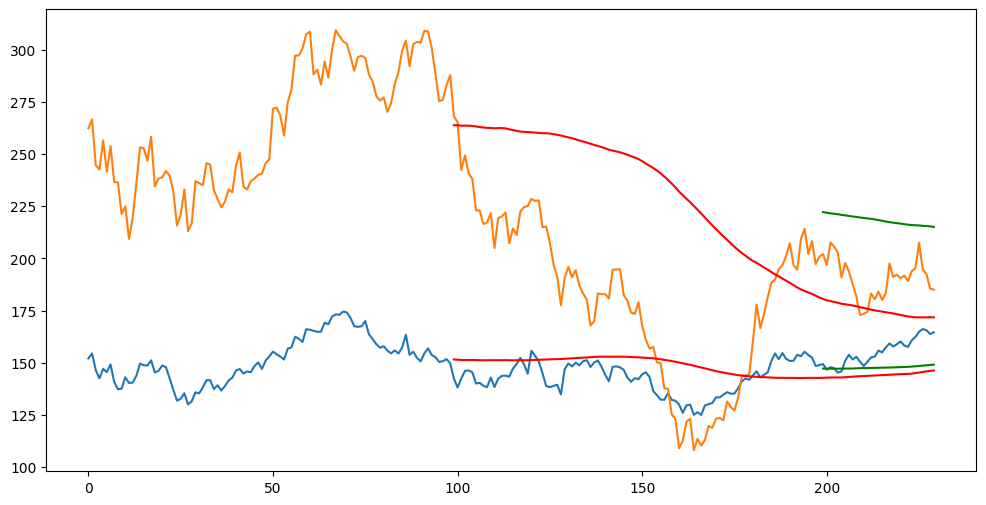

In [184]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [185]:
df. shape

(230, 11)

In [186]:
#splitting  Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(161, 2)
(69, 2)


In [187]:
data_training.head()

,AAPL,TSLA
0,152.059998,262.369995
1,154.509995,266.679993
2,146.500000,244.666672
3,142.559998,242.666672
4,147.110001,256.529999


In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [189]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[4.94833708e-01, 7.65507891e-01],
       [5.49865080e-01, 7.87034199e-01],
       [3.69946084e-01, 6.77088539e-01],
       [2.81446486e-01, 6.67099527e-01],
       [3.83647803e-01, 7.36339995e-01],
       [3.48382593e-01, 6.61056142e-01],
       [4.31491574e-01, 7.23054591e-01],
       [2.42363152e-01, 6.36816144e-01],
       [1.64420634e-01, 6.36166834e-01],
       [1.69811250e-01, 5.60383576e-01],
       [2.93800552e-01, 5.78696713e-01],
       [2.32030567e-01, 5.00882380e-01],
       [2.35624539e-01, 5.51892932e-01],
       [3.08849925e-01, 6.33353309e-01],
       [4.40476162e-01, 7.19758275e-01],
       [4.22506643e-01, 7.17477383e-01],
       [4.19586841e-01, 6.87693481e-01],
       [4.75741372e-01, 7.45346811e-01],
       [3.44788963e-01, 6.26394259e-01],
       [3.61859817e-01, 6.45190264e-01],
       [4.19586841e-01, 6.48220301e-01],
       [4.02740481e-01, 6.63103907e-01],
       [2.83243473e-01, 6.52315757e-01],
       [1.59479008e-01, 6.14973488e-01],
       [4.155449

In [190]:
data_training_array.shape

(161, 2)

In [191]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [192]:
x_train.shape

(61, 100, 2)

In [193]:
#ML Model

In [194]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [195]:
model = tf.keras.Sequential()
model.add(LSTM(units=50, activation = 'relu' ,return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.1))

model = Sequential()
model.add(LSTM(units=60, activation = 'relu' ,return_sequences = True))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units=80, activation = 'relu' ,return_sequences = True))
model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])


In [196]:
input_shape = (None,x_train.shape[1], 1)
model.build(input_shape)

In [197]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 120)               58560     
                                                                 
 dropout_19 (Dropout)        (None, 120)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 242       
                                                                 
Total params: 58802 (229.70 KB)
Trainable params: 58802 (229.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [198]:
# Assuming x_train has shape (None, 100, 2)
# Selecting the first feature
x_train_single_feature = x_train[:, :, 0:1]

# Now x_train_single_feature has shape (None, 100, 1)

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_single_feature, y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 2s 86ms/step - loss: 0.0997
Epoch 2/50
2/2 [==============================] - 0s 56ms/step - loss: 0.0873
Epoch 3/50
2/2 [==============================] - 0s 54ms/step - loss: 0.0770
Epoch 4/50
2/2 [==============================] - 0s 60ms/step - loss: 0.0661
Epoch 5/50
2/2 [==============================] - 0s 57ms/step - loss: 0.0550
Epoch 6/50
2/2 [==============================] - 0s 51ms/step - loss: 0.0397
Epoch 7/50
2/2 [==============================] - 0s 56ms/step - loss: 0.0245
Epoch 8/50
2/2 [==============================] - 0s 51ms/step - loss: 0.0418
Epoch 9/50
2/2 [==============================] - 0s 73ms/step - loss: 0.0277
Epoch 10/50
2/2 [==============================] - 0s 63ms/step - loss: 0.0203
Epoch 11/50
2/2 [==============================] - 0s 47ms/step - loss: 0.0230
Epoch 12/50
2/2 [==============================] - 0s 62ms/step - loss: 0.0244
Epoch 13/50
2/2 [==============================] - 0s 56ms/st

In [199]:
model.save('keras_model.h5')

c:\Users\rishm\Downloads\Stock_trend_Prediction-main\stock\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [200]:
data_testing.head()

,AAPL,TSLA
161,126.040001,112.709999
162,129.610001,121.820000
163,129.929993,123.180000
164,125.070000,108.099998
165,126.360001,113.639999


In [201]:
data_training.tail(100)

,AAPL,TSLA
61,165.350006,288.170013
62,164.869995,290.423340
63,164.919998,283.333344
64,169.240005,294.356659
65,168.490005,286.630005
...,...,...
156,132.300003,137.800003
157,135.449997,137.570007
158,132.229996,125.349998
159,131.860001,123.150002


In [202]:
past_100_days = data_training.tail(100)

In [203]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)

In [204]:
final_df.head()

,AAPL,TSLA
0,165.350006,288.170013
1,164.869995,290.423340
2,164.919998,283.333344
3,169.240005,294.356659
4,168.490005,286.630005


In [205]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.81425407, 0.8948912 ],
       [0.80456276, 0.90608952],
       [0.80557231, 0.87085447],
       [0.89279231, 0.92563688],
       [0.87764997, 0.88723784],
       [0.9505351 , 0.95383159],
       [0.97254189, 1.        ],
       [0.96931145, 0.98630015],
       [1.        , 0.97354471],
       [0.9919239 , 0.96794547],
       [0.93882499, 0.93711684],
       [0.85907541, 0.90355493],
       [0.85221065, 0.93605671],
       [0.85826765, 0.93925392],
       [0.9087421 , 0.93415168],
       [0.77932553, 0.89449354],
       [0.73410062, 0.87824272],
       [0.68423183, 0.84285859],
       [0.65011105, 0.83247182],
       [0.6650516 , 0.84017492],
       [0.62164339, 0.80563555],
       [0.59580049, 0.82655803],
       [0.62467204, 0.8726767 ],
       [0.59438737, 0.90030814],
       [0.6531394 , 0.95209217],
       [0.77548942, 0.97564858],
       [0.58186949, 0.91457111],
       [0.6115485 , 0.96665331],
       [0.55219049, 0.97231882],
       [0.51847359, 0.97033098],
       [0.

In [206]:
input_data.shape

(169, 2)

In [207]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [208]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(69, 100, 2)
(69,)


In [209]:
print("Original x_test shape:", x_test.shape)
print("Reshaped x_test shape:", x_test_reshaped.shape)

Original x_test shape: (69, 100, 2)
Reshaped x_test shape: (69, 100, 2)


In [210]:
model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 120)               58560     
                                                                 
 dropout_19 (Dropout)        (None, 120)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 242       
                                                                 
Total params: 58802 (229.70 KB)
Trainable params: 58802 (229.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [211]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [212]:
y_predicted.shape

(69, 2)

In [213]:
y_test

array([0.02059366, 0.09267118, 0.09913175, 0.00100955, 0.02705439,
       0.        , 0.09287296, 0.10357352, 0.11528363, 0.17100763,
       0.16939241, 0.19664843, 0.22047253, 0.20573408, 0.20694541,
       0.25943866, 0.32485366, 0.35352311, 0.339996  , 0.38239466,
       0.42216825, 0.36301234, 0.38905702, 0.41207336, 0.52089657,
       0.59519482, 0.53926904, 0.59822317, 0.54310515, 0.52190582,
       0.52473237, 0.58207159, 0.56894804, 0.61195238, 0.57924503,
       0.55582481, 0.47365225, 0.48233402, 0.49222681, 0.43791656,
       0.46234602, 0.45204935, 0.40965068, 0.42176467, 0.52513626,
       0.58166771, 0.53664458, 0.56228538, 0.5162527 , 0.47405613,
       0.51383003, 0.55663227, 0.56470836, 0.62245115, 0.60528971,
       0.65374506, 0.69170195, 0.66242683, 0.68463541, 0.71128606,
       0.67151217, 0.65879251, 0.72178484, 0.75388652, 0.80516843,
       0.83080953, 0.81990719, 0.78215209, 0.80032307])

In [214]:
y_predicted

array([[26339.154, 27997.55 ],
       [24500.438, 26246.125],
       [23821.473, 25725.076],
       [23344.72 , 25395.43 ],
       [21923.848, 24019.926],
       [21088.828, 23263.51 ],
       [20127.455, 22369.344],
       [20347.574, 22759.76 ],
       [20668.895, 23183.4  ],
       [21091.248, 23647.068],
       [22046.098, 24648.555],
       [22833.262, 25394.887],
       [23776.197, 26271.547],
       [24801.424, 27208.79 ],
       [25482.875, 27754.523],
       [26038.73 , 28179.26 ],
       [27029.814, 29094.842],
       [28517.166, 30523.928],
       [30005.846, 31929.26 ],
       [31098.555, 32854.992],
       [32377.154, 34021.05 ],
       [33721.816, 35349.613],
       [34313.266, 35732.836],
       [35032.723, 36308.535],
       [35797.246, 36999.645],
       [37171.426, 38599.58 ],
       [38829.617, 40552.793],
       [39840.688, 41655.703],
       [41143.484, 43093.12 ],
       [41858.05 , 43763.992],
       [42340.938, 44110.902],
       [42759.67 , 44412.945],
       [

In [215]:
scaler.scale_

array([0.02018978, 0.00496968])

In [216]:
scale_factor = 1/0.02018978
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

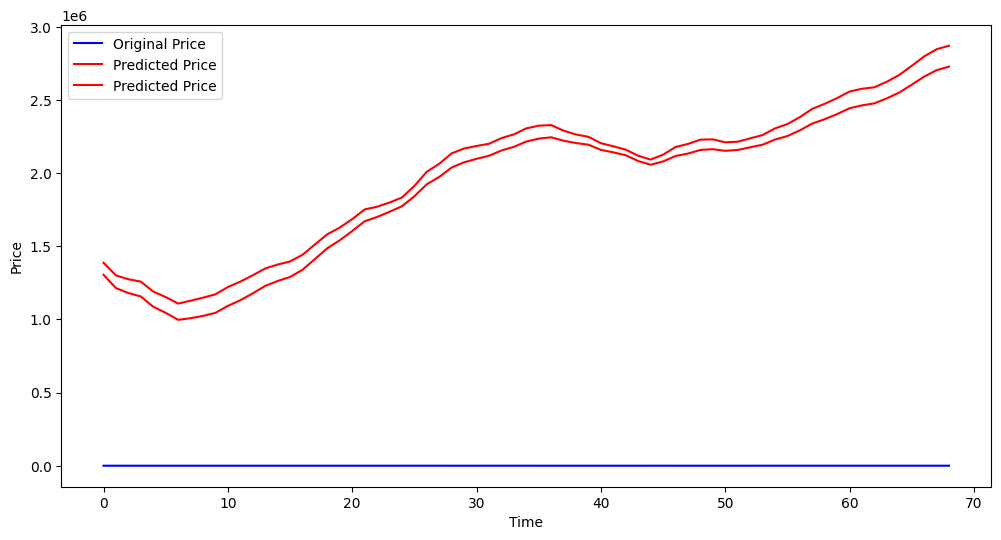

In [217]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted , 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()